# Toy Experiment

In [1]:
import numpy as np
import numpy.linalg as linalg
def postive(A):
    return np.max(np.array([np.zeros(np.shape(A)),A]), axis=0)

def negative(A):
    return np.min(np.array([np.zeros(np.shape(A)),A]), axis=0)

In [2]:
gamma=7/5

A = np.array([[0,1,0,0],
              [0,0,0,1],
              [0,0,0,0],
              [0,gamma,0,0]])
B = np.array([[0,0,1,0],
              [0,0,0,0],
              [0,0,0,1],
              [0,0,gamma,0]])

Lam, R = linalg.eig(A)
Sig, S = linalg.eig(B)
LAM = np.diag(Lam)
SIG = np.diag(Sig)
iR = linalg.inv(R)
iS = linalg.inv(S)
A_p = R@postive(LAM)@iR
A_n = R@negative(LAM)@iR

B_p = S@postive(SIG)@iS
B_n = S@negative(SIG)@iS

print(A_p)
print(A_n)

print()

print(B_p)
print(B_n)
print()

[[0.         0.5        0.         0.42257713]
 [0.         0.59160798 0.         0.5       ]
 [0.         0.         0.         0.        ]
 [0.         0.7        0.         0.59160798]]
[[ 0.          0.5         0.         -0.42257713]
 [ 0.         -0.59160798  0.          0.5       ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.7         0.         -0.59160798]]

[[0.         0.         0.5        0.42257713]
 [0.         0.         0.         0.        ]
 [0.         0.         0.59160798 0.5       ]
 [0.         0.         0.7        0.59160798]]
[[ 0.          0.          0.5        -0.42257713]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         -0.59160798  0.5       ]
 [ 0.          0.          0.7        -0.59160798]]



In [3]:
N=50
delta = 1/N
dt = 0.0001
print(dt)
T=[0.1,0.2,0.3,0.4,1.0]
Range=int(T[4]/dt)+1
print(Range)

0.0001
10001


In [4]:
def condition(x, y, delta, x0, y0, r):
    return (0+x*delta-x0)**2 + (0+y*delta-y0)**2 <= r**2  
rows, cols = np.indices((N,N))
x0 = 1/3
y0 = 1/3
r = 1/5
boolean_array = condition(rows, cols, delta, x0, y0, r)

rho = np.where(boolean_array,1,0)
u = np.zeros((N,N))
v = np.zeros((N,N))
p = np.where(boolean_array,1,0)

Q = np.zeros((4,Range+1,N,N))
Q[0,0,:,:] = rho
Q[1,0,:,:] = u
Q[2,0,:,:] = v
Q[3,0,:,:] = p

In [5]:
for n in range(Range):
    if n%50==0:
        print('time = {}'.format(dt*n))
    for i in range(N):
        for j in range(N):
            if 0<i<N-1:
                Q_ip_j = Q[:,n,i+1,j]
                Q_in_j = Q[:,n,i-1,j]
                
                F_ip_j = A_p@ Q[:,n,i,j]+A_n@Q_ip_j
                F_in_j = A_p@Q_in_j+A_n@Q[:,n,i,j]
                if 0<j<N-1:
                    Q_i_jp = Q[:,n,i,j+1]
                    Q_i_jn = Q[:,n,i,j-1]
                                        
                    G_i_jp = B_p@Q[:,n,i,j]+B_n@Q_i_jp
                    G_i_jn = B_p@Q_i_jn+B_n@Q[:,n,i,j]
                    
                elif j==0:
                    Q_i_2 = Q[:,n,i,1]
                    Q_i_1 = Q[:,n,i,0]
                    Q_i_0 = np.copy(Q_i_1)
                    Q_i_0[2] = -Q_i_1[2]
                    
                    G_i_jp = B_p@Q_i_1+B_n@Q_i_2
                    G_i_jn = B_p@Q_i_0+B_n@Q_i_1
                    
                elif j==N-1:
                    Q_i_N_2 = Q[:,n,i,N-2]
                    Q_i_N_1 = Q[:,n,i,N-1]
                    Q_i_N = np.copy(Q_i_N_1)
                    Q_i_N[2] = -Q_i_N_1[2]
                    
                    G_i_jp = B_p@Q_i_N_1+B_n@Q_i_N
                    G_i_jn = B_p@Q_i_N_2+B_n@Q_i_N_1
                    
            elif i==0:
                Q_2_j = Q[:,n,1,j]
                Q_1_j = Q[:,n,0,j]
                Q_0_j = np.copy(Q_1_j)
                Q_0_j[1] = - Q_1_j[1]

                F_ip_j = A_p@Q_1_j+A_n@Q_2_j
                F_in_j = A_p@Q_0_j+A_n@Q_1_j   

                if 0<j<N-1:
                    Q_i_jp = Q[:,n,i,j+1]
                    Q_i_jn = Q[:,n,i,j-1]
                                        
                    G_i_jp = B_p@Q[:,n,i,j]+B_n@Q_i_jp
                    G_i_jn = B_p@Q_i_jn+B_n@Q[:,n,i,j]
                    
                elif j==0:
                    Q_i_2 = Q[:,n,i,1]
                    Q_i_1 = Q[:,n,i,0]
                    Q_i_0 = np.copy(Q_i_1)
                    Q_i_0[2] = -Q_i_1[2]
                    
                    G_i_jp = B_p@Q_i_1+B_n@Q_i_2
                    G_i_jn = B_p@Q_i_0+B_n@Q_i_1
                    
                elif j==N-1:
                    Q_i_N_2 = Q[:,n,i,N-2]
                    Q_i_N_1 = Q[:,n,i,N-1]
                    Q_i_N = np.copy(Q_i_N_1)
                    Q_i_N[2] = -Q_i_N_1[2]
                    
                    G_i_jp = B_p@Q_i_N_1+B_n@Q_i_N
                    G_i_jn = B_p@Q_i_N_2+B_n@Q_i_N_1
                
            elif i==N-1:
                Q_N_2_j = Q[:,n,N-2,j]
                Q_N_1_j = Q[:,n,N-1,j]
                Q_N_j = np.copy(Q_N_1_j)
                Q_N_j[1] = -Q_N_1_j[1]
                    
                F_ip_j = A_p@Q_N_1_j+A_n@Q_N_j
                F_in_j = A_p@Q_N_2_j+A_n@Q_N_1_j
                
                if 0<j<N-1:
                    Q_i_jp = Q[:,n,i,j+1]
                    Q_i_jn = Q[:,n,i,j-1]
                                        
                    G_i_jp = B_p@Q[:,n,i,j]+B_n@Q_i_jp
                    G_i_jn = B_p@Q_i_jn+B_n@Q[:,n,i,j]
                    
                elif j==0:
                    Q_i_2 = Q[:,n,i,1]
                    Q_i_1 = Q[:,n,i,0]
                    Q_i_0 = np.copy(Q_i_1)
                    Q_i_0[2] = -Q_i_1[2]
                    
                    G_i_jp = B_p@Q_i_1+B_n@Q_i_2
                    G_i_jn = B_p@Q_i_0+B_n@Q_i_1
                    
                elif j==N-1:
                    Q_i_N_2 = Q[:,n,i,N-2]
                    Q_i_N_1 = Q[:,n,i,N-1]
                    Q_i_N = np.copy(Q_i_N_1)
                    Q_i_N[2] = -Q_i_N_1[2]
                    
                    G_i_jp = B_p@Q_i_N_1+B_n@Q_i_N
                    G_i_jn = B_p@Q_i_N_2+B_n@Q_i_N_1
                    
            Q[:,n+1,i,j] = Q[:,n,i,j]-dt/delta*(F_ip_j-F_in_j)-dt/delta*(G_i_jp-G_i_jn)
            

        
                    
    

time = 0.0
time = 0.005
time = 0.01
time = 0.015000000000000001
time = 0.02
time = 0.025
time = 0.030000000000000002
time = 0.035
time = 0.04
time = 0.045000000000000005
time = 0.05
time = 0.055
time = 0.060000000000000005
time = 0.065
time = 0.07
time = 0.075
time = 0.08
time = 0.085
time = 0.09000000000000001
time = 0.095
time = 0.1
time = 0.10500000000000001
time = 0.11
time = 0.115
time = 0.12000000000000001
time = 0.125
time = 0.13
time = 0.135
time = 0.14
time = 0.14500000000000002
time = 0.15
time = 0.155
time = 0.16
time = 0.165
time = 0.17
time = 0.17500000000000002
time = 0.18000000000000002
time = 0.185
time = 0.19
time = 0.195
time = 0.2
time = 0.20500000000000002
time = 0.21000000000000002
time = 0.215
time = 0.22
time = 0.225
time = 0.23
time = 0.23500000000000001
time = 0.24000000000000002
time = 0.24500000000000002
time = 0.25
time = 0.255
time = 0.26
time = 0.265
time = 0.27
time = 0.275
time = 0.28
time = 0.28500000000000003
time = 0.29000000000000004
time = 0.2950000

In [6]:
import pickle

with open('Q_toy.pkl', 'wb') as file:
    pickle.dump(Q, file)


In [ ]:
with open('Q_toy.pkl', 'rb') as file:
    Q = pickle.load(file)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
x_extent = [0, 1]
y_extent = [0, 1]
output_folder = 'output_images_toy/'


for n in range(0, Range, 50):
    plt.imshow(Q[0, n, :, :], cmap='plasma', origin='lower', interpolation='none', extent=[x_extent[0], x_extent[1], y_extent[0], y_extent[1]])
    plt.colorbar()
    plt.title('time={}'.format(n * dt))


    plt.savefig(output_folder + 'image_{:04d}.png'.format(n), dpi=300)
    plt.close()


images = []
for n in range(0, Range, 50):
    img_path = output_folder + 'image_{:04d}.png'.format(n)
    images.append(Image.open(img_path))


output_gif_path = 'output_animation_toy.gif'
images[0].save(output_gif_path, save_all=True, append_images=images[1:], duration=100, loop=1)


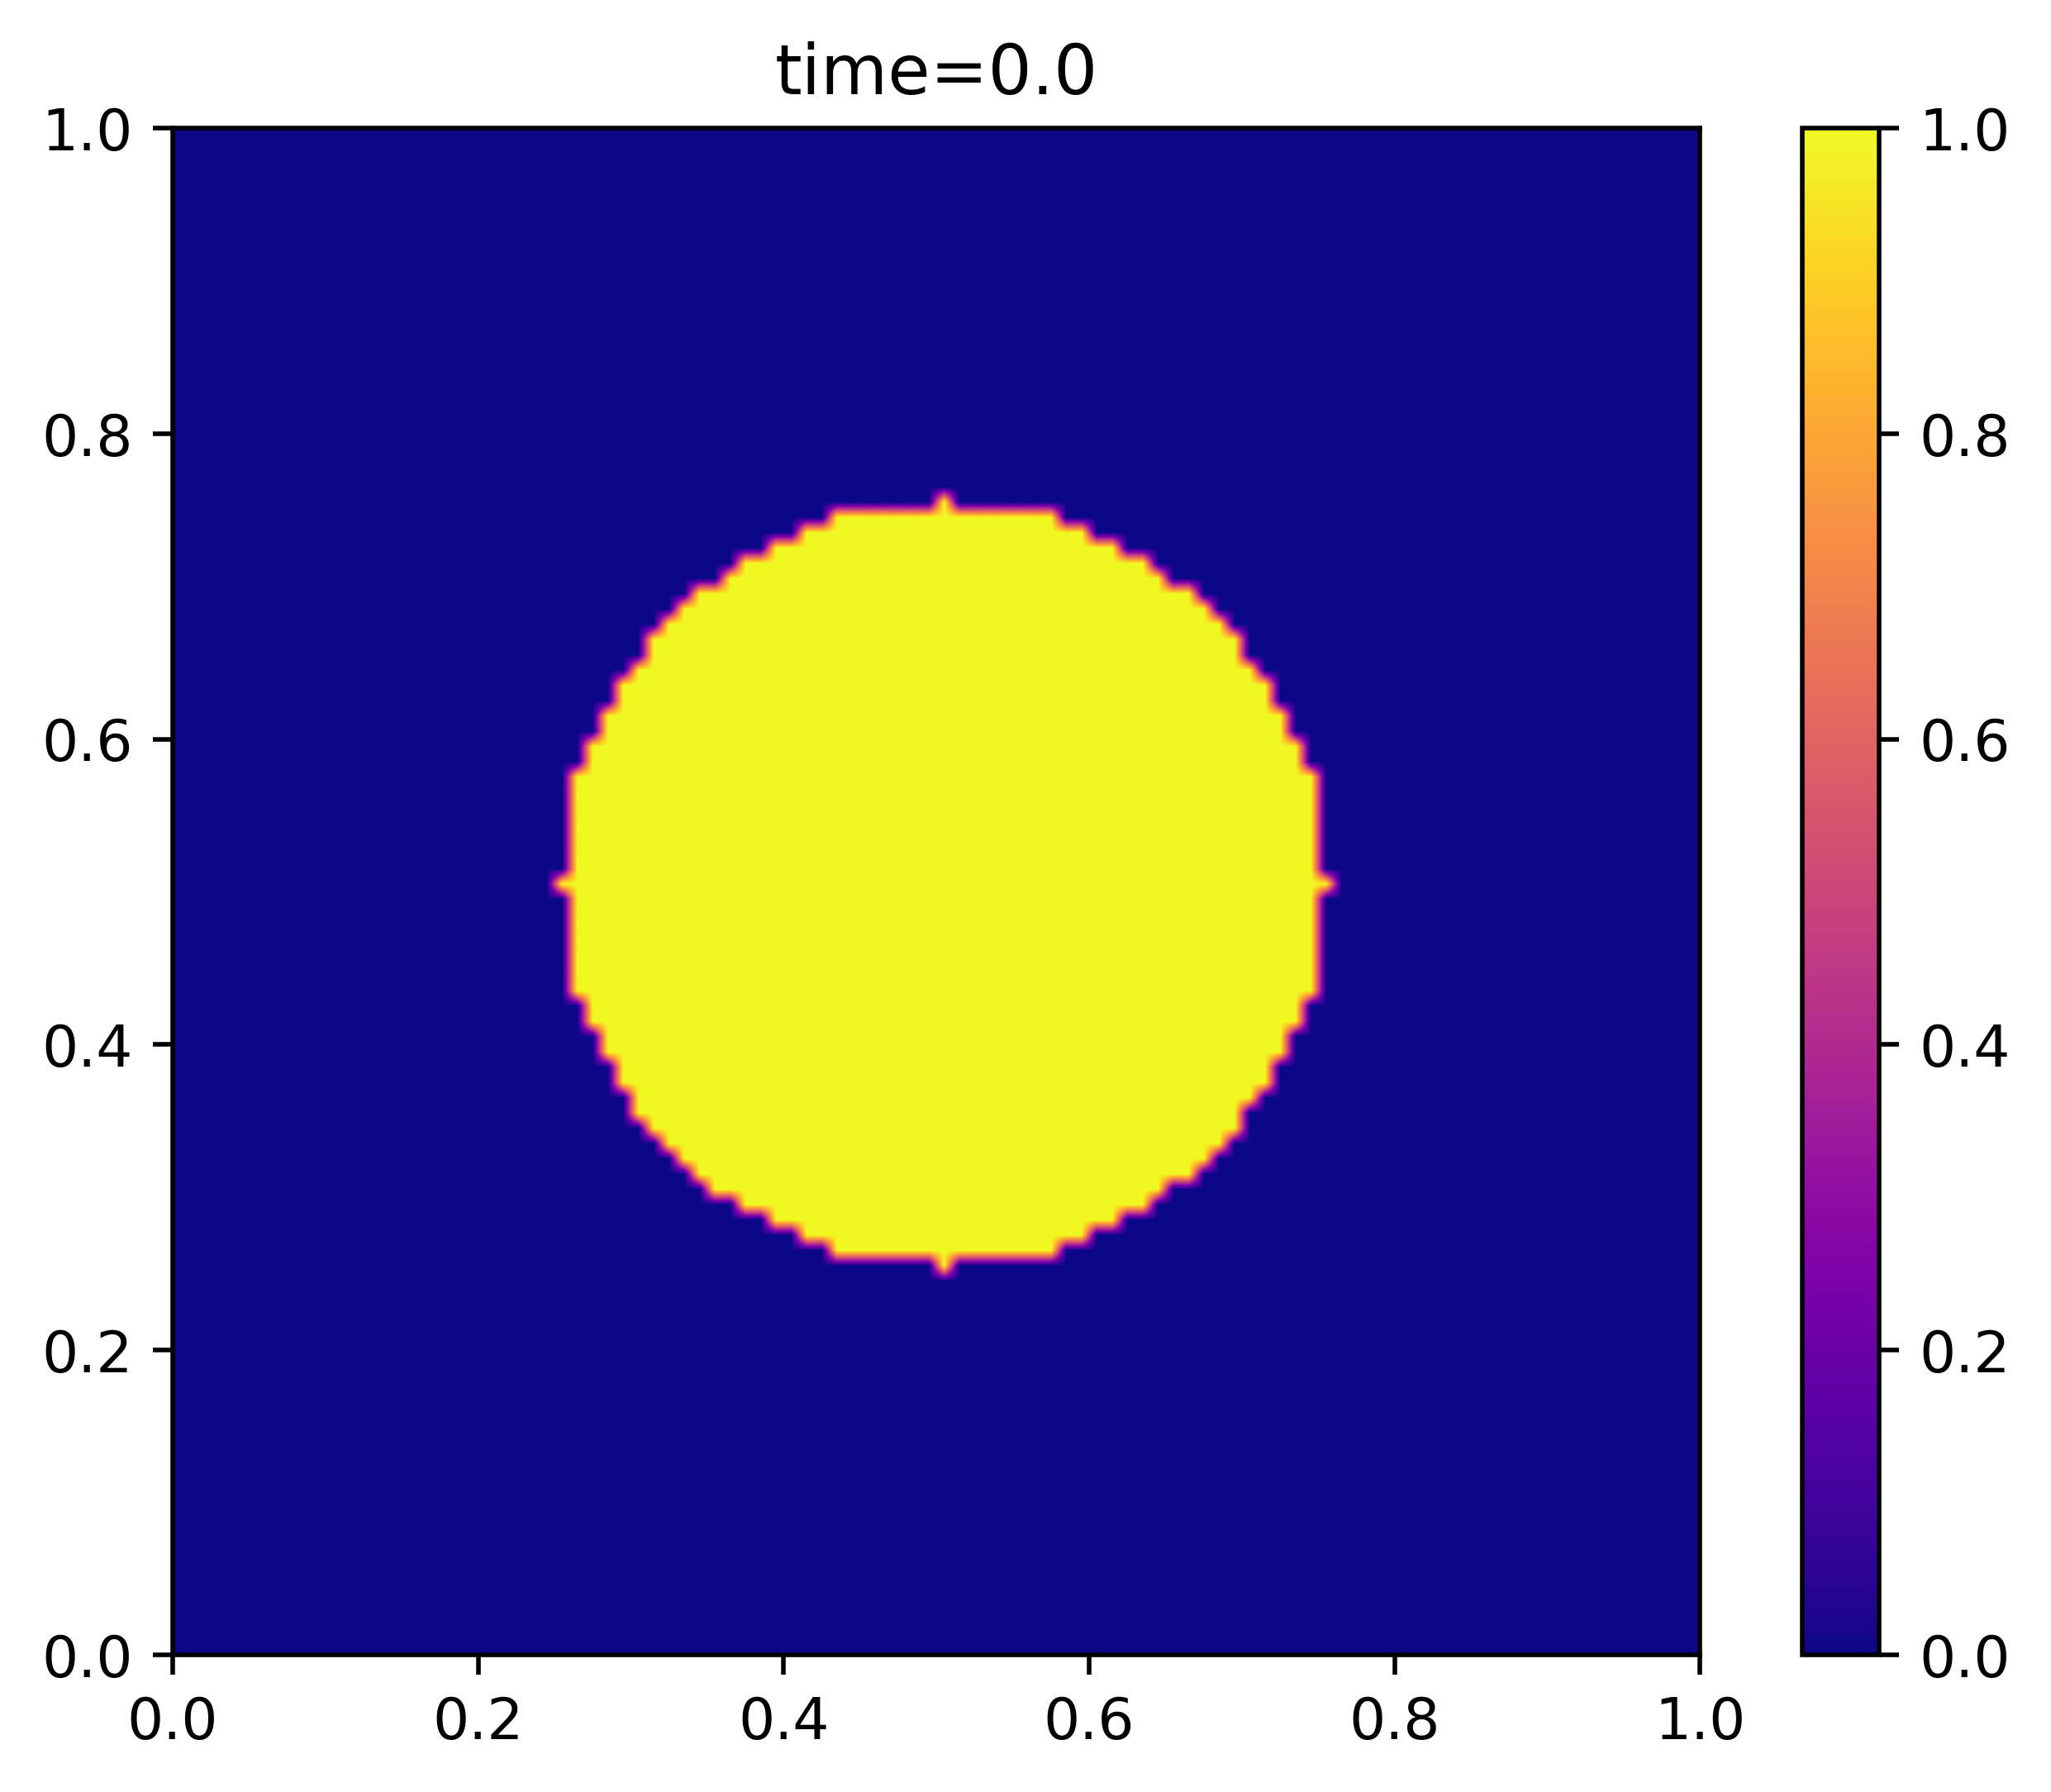

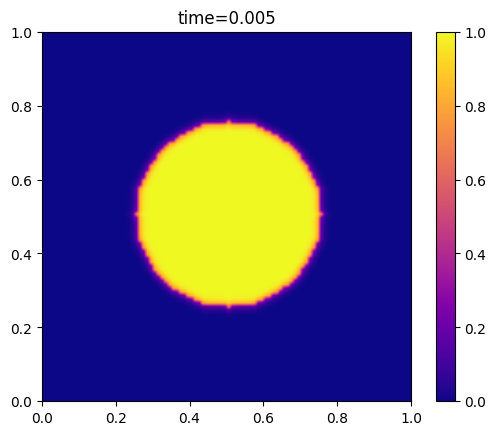

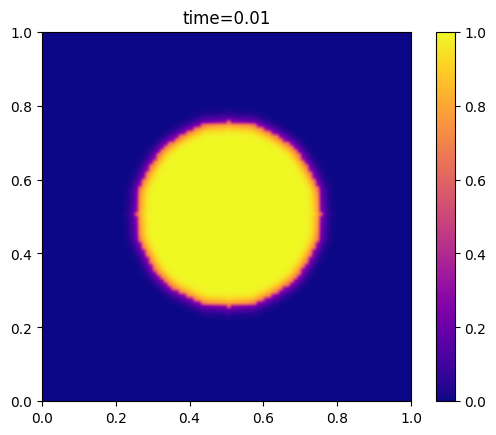

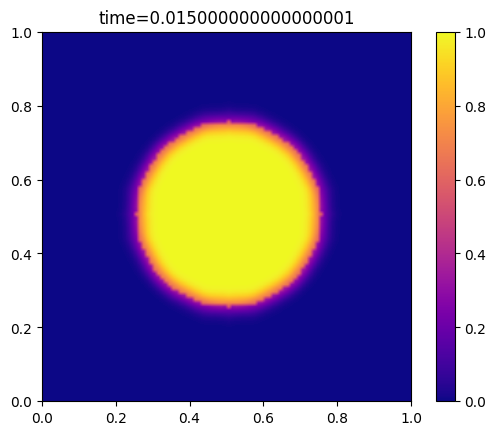

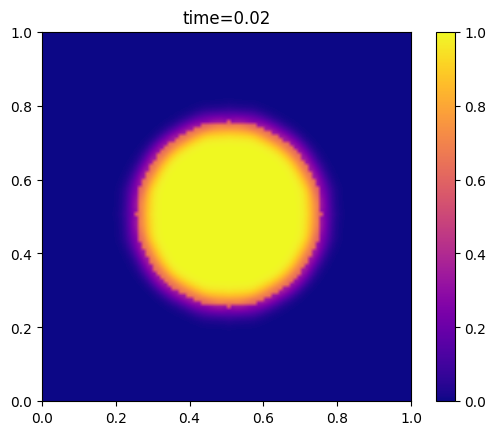

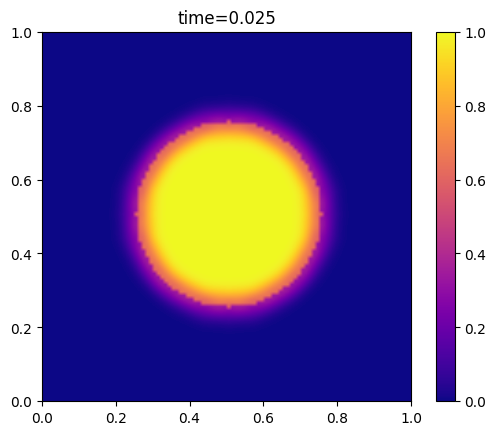

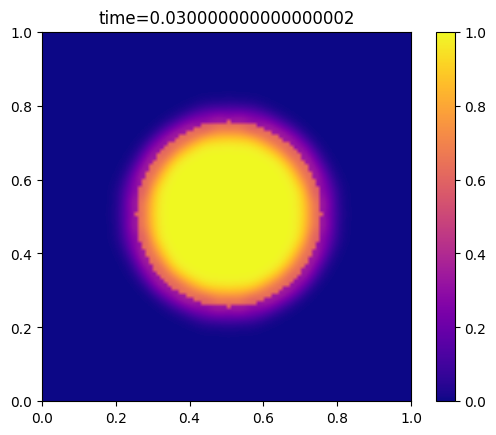

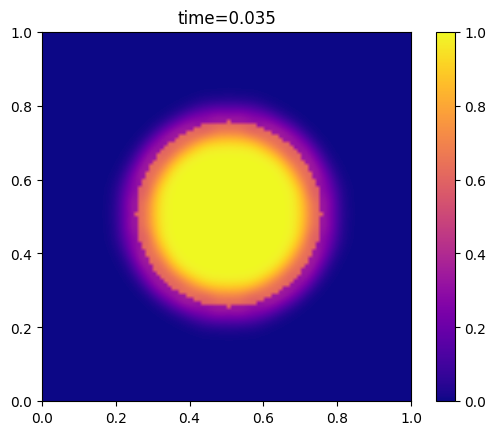

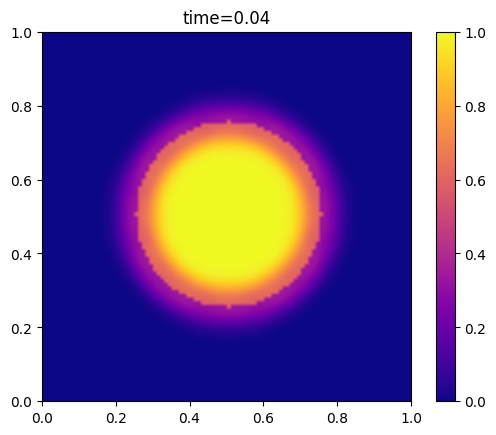

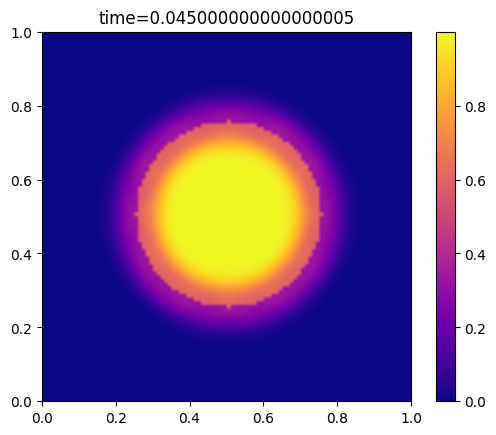

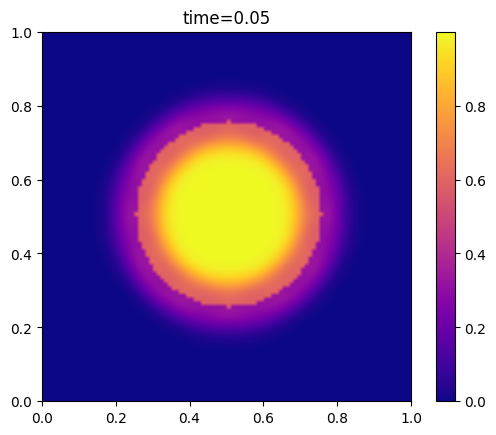

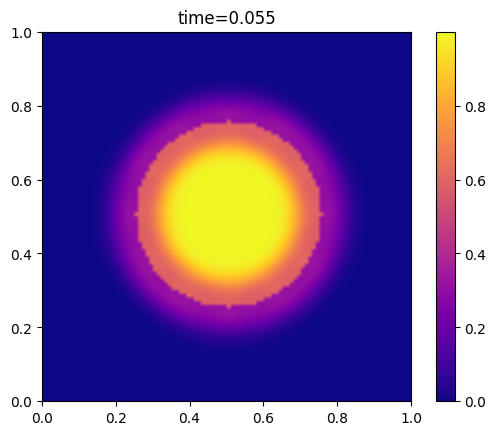

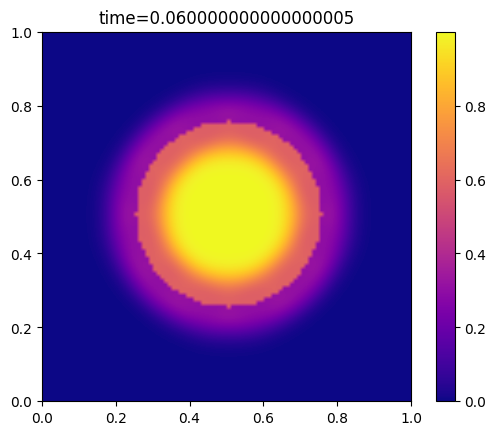

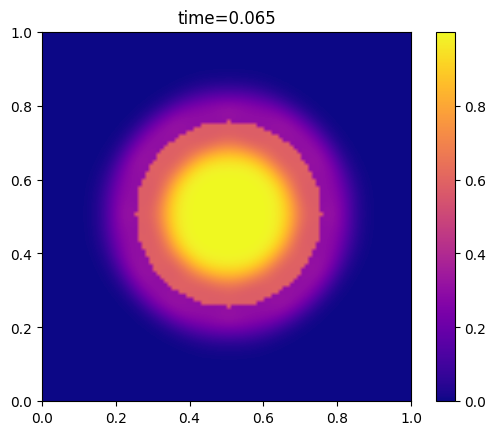

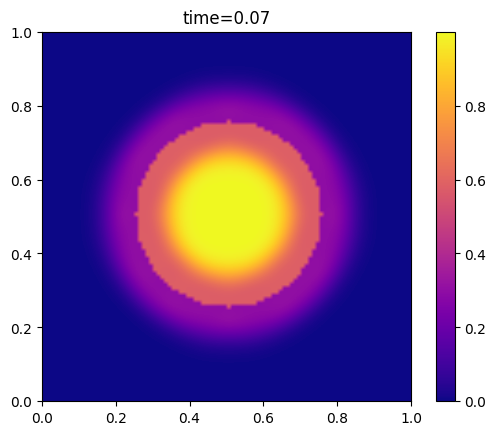

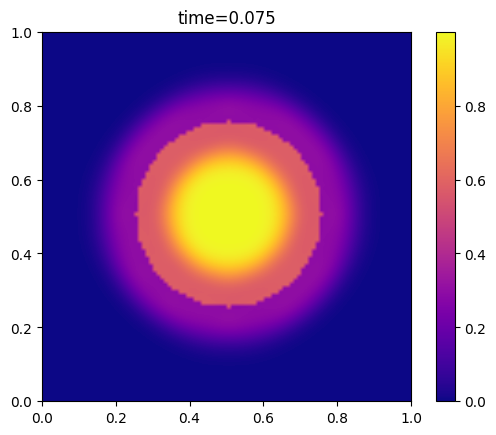

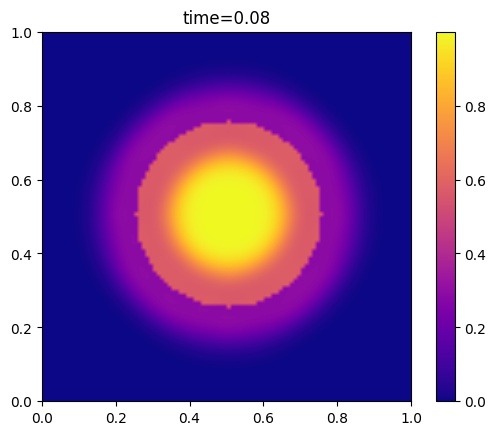

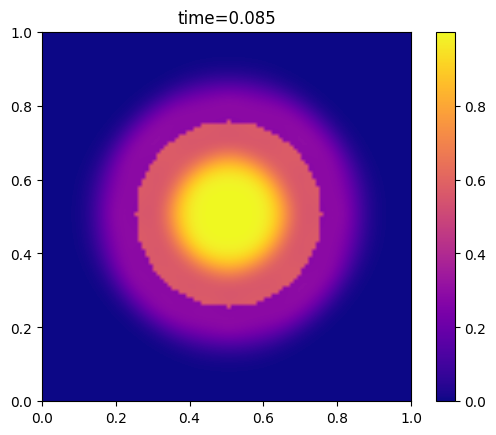

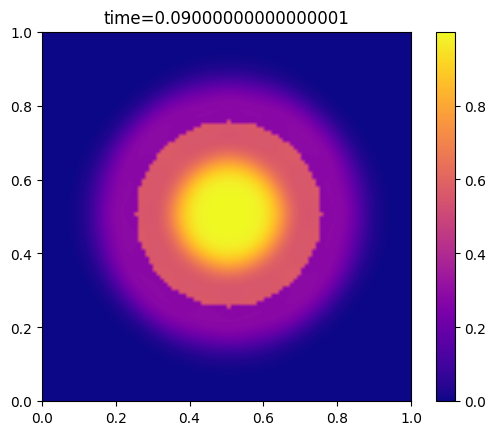

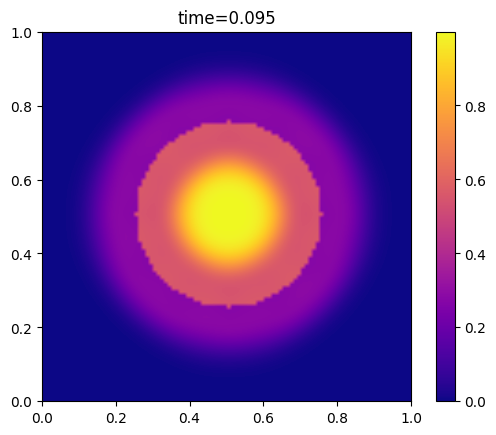

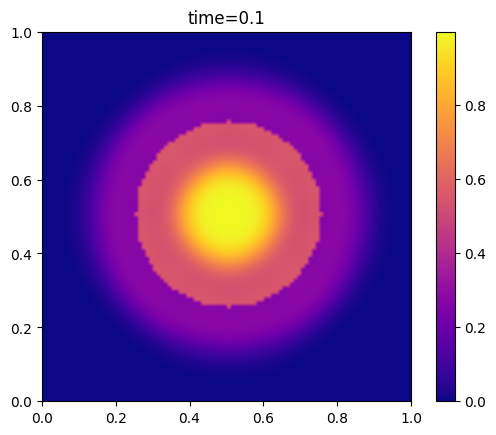

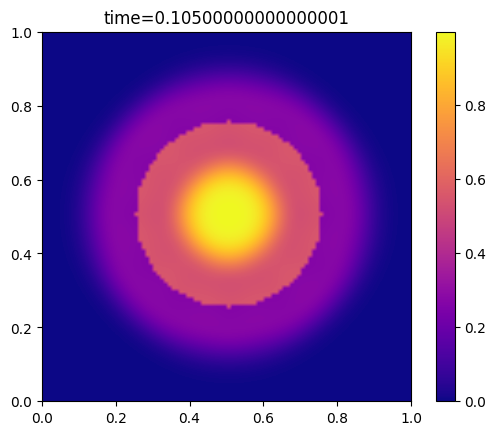

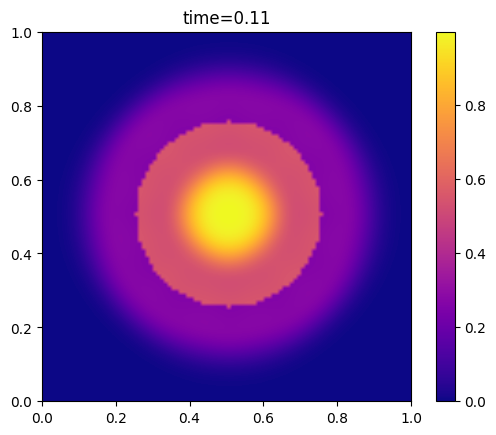

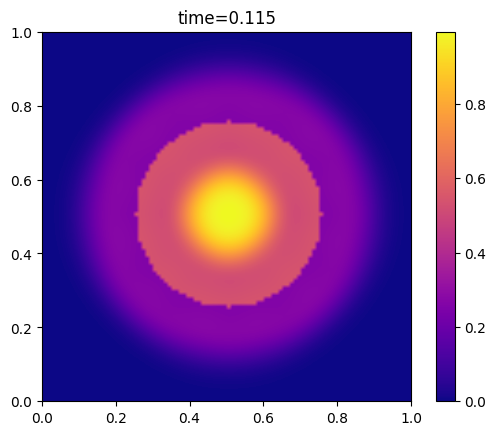

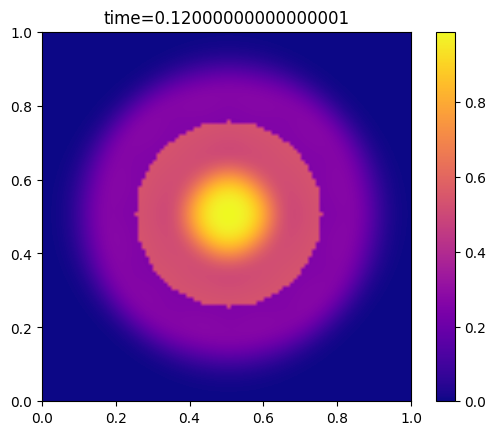

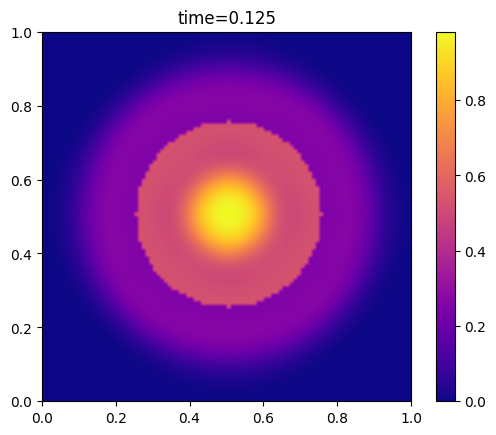

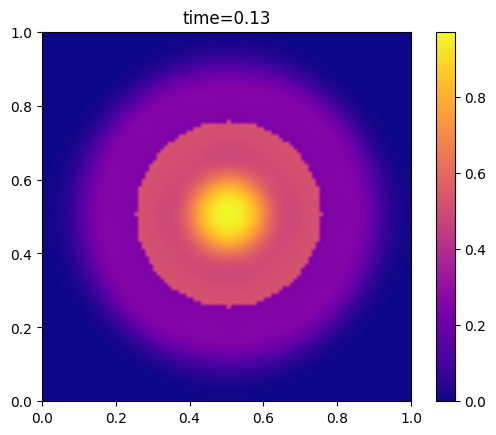

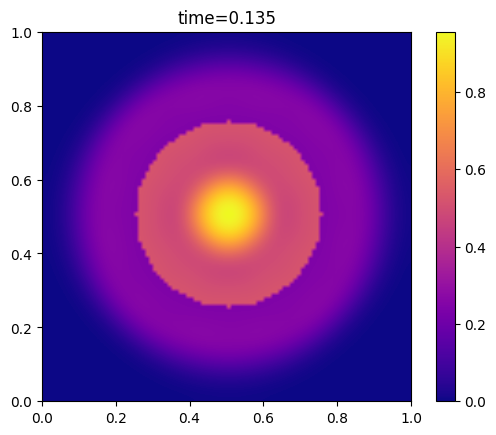

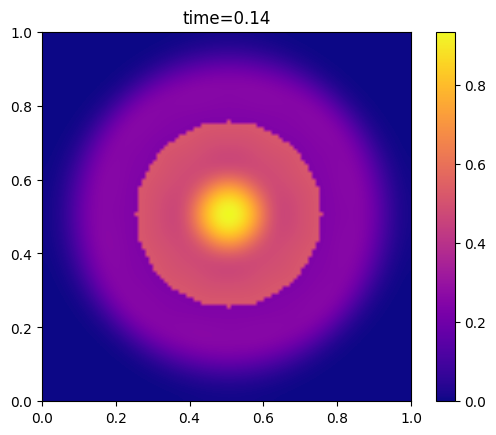

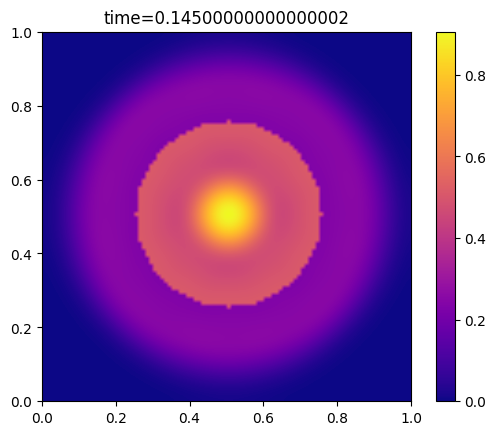

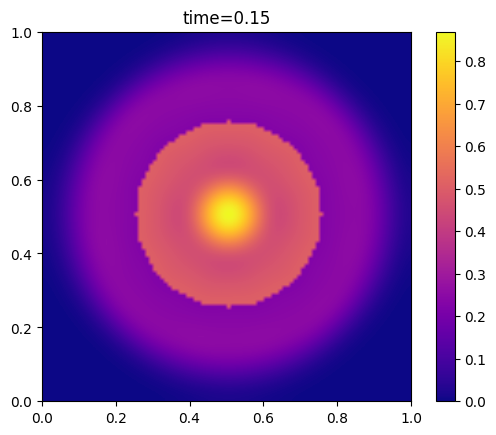

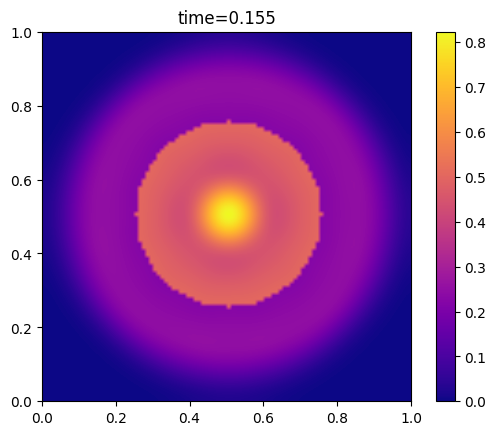

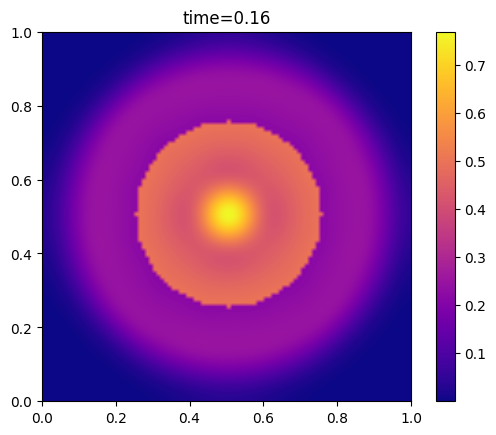

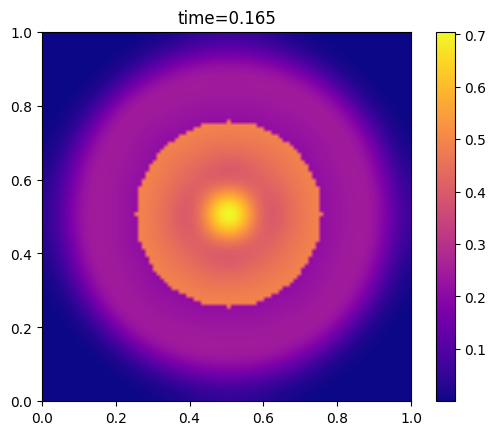

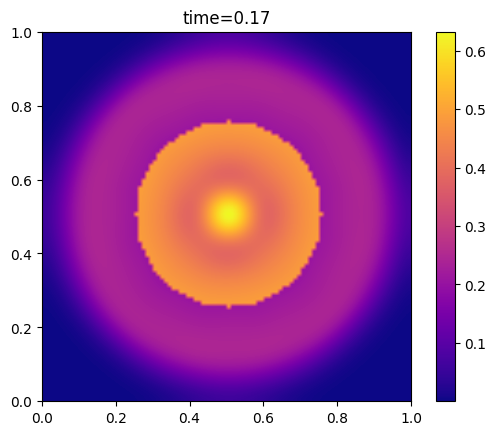

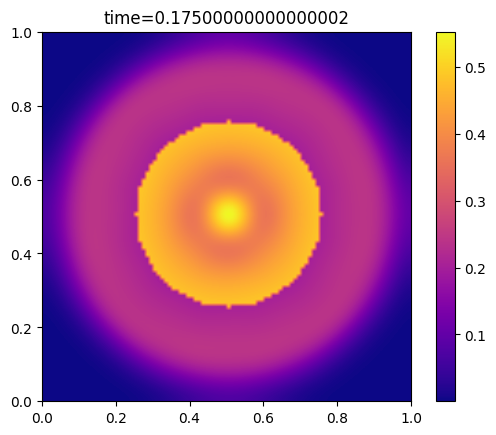

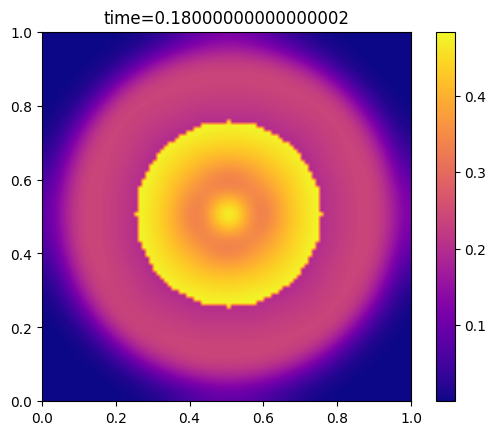

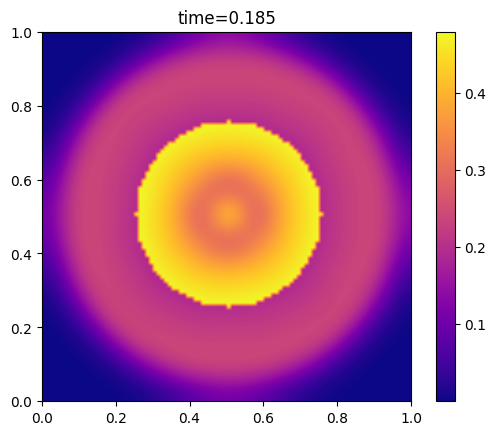

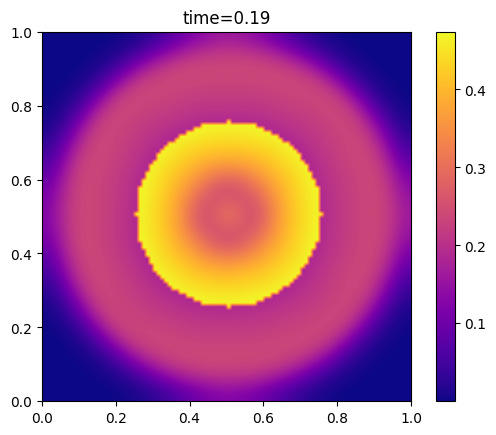

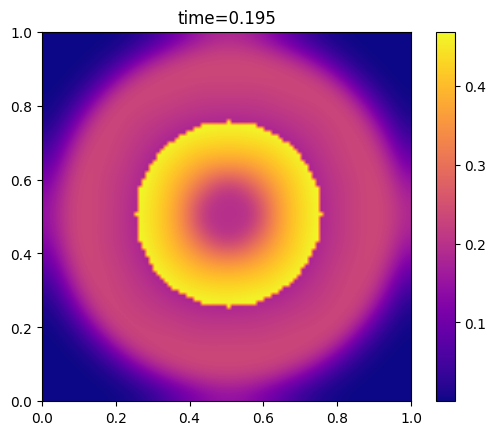

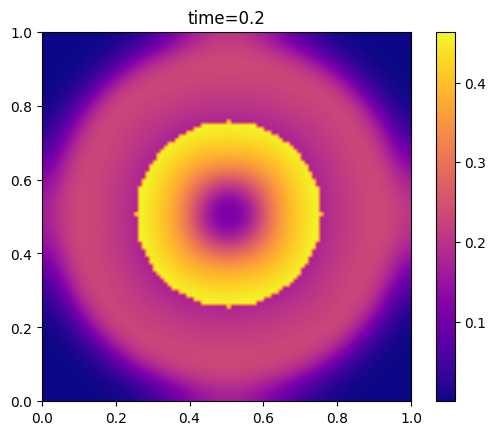

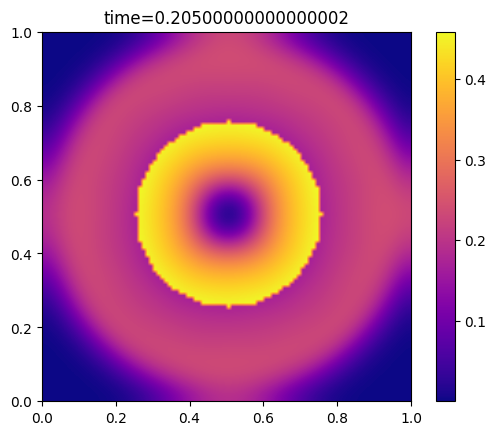

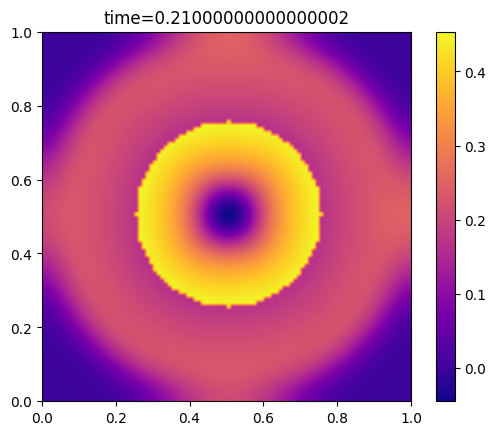

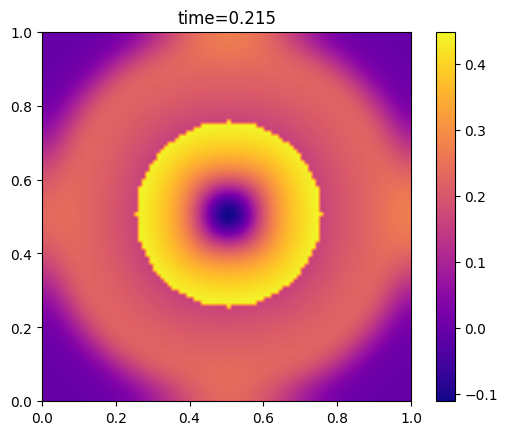

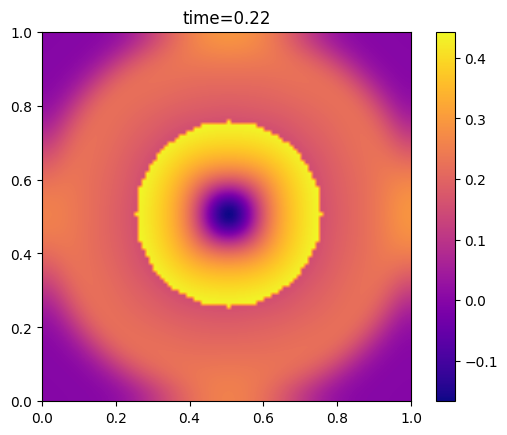

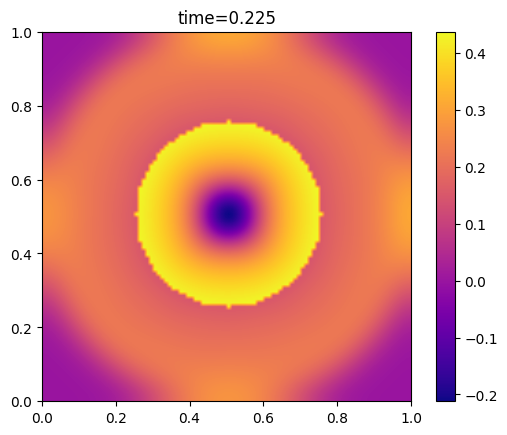

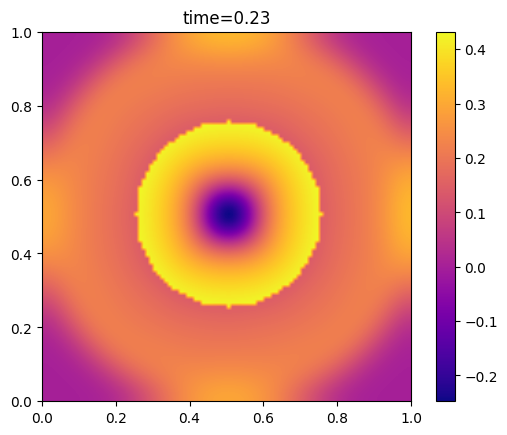

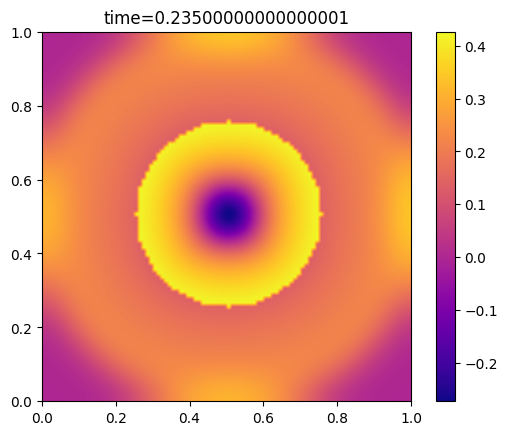

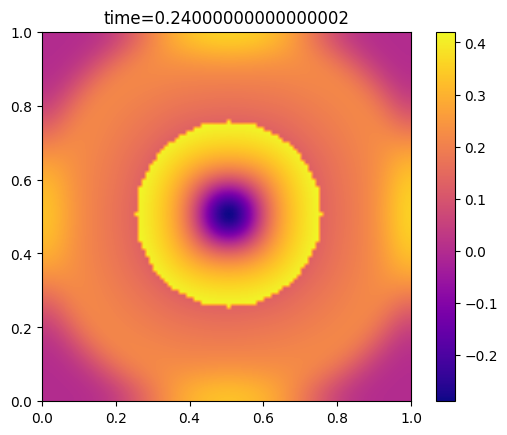

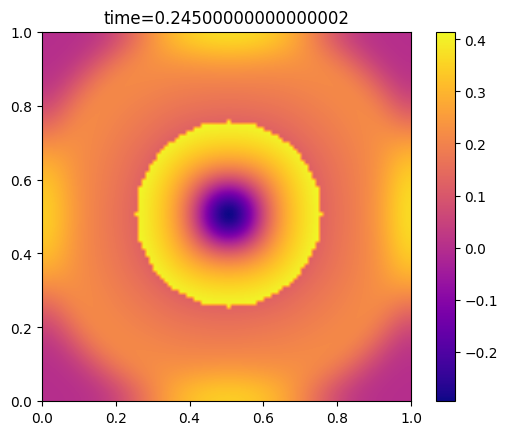

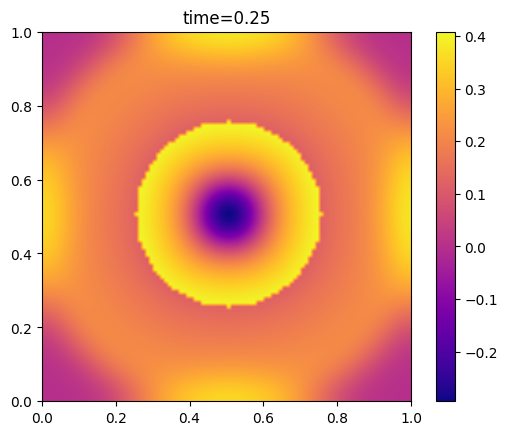

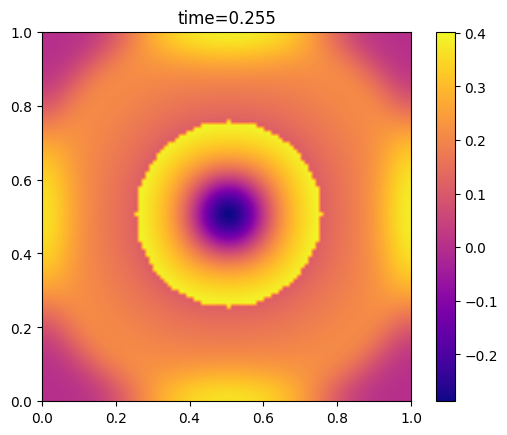

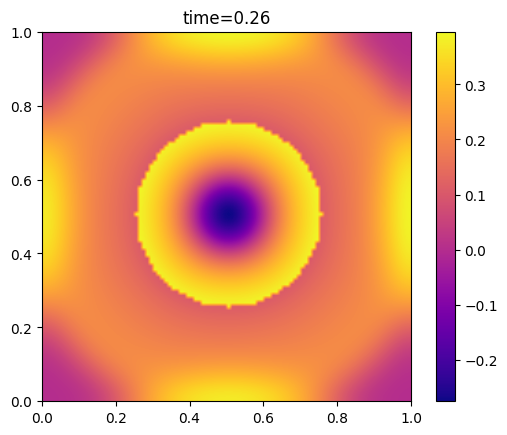

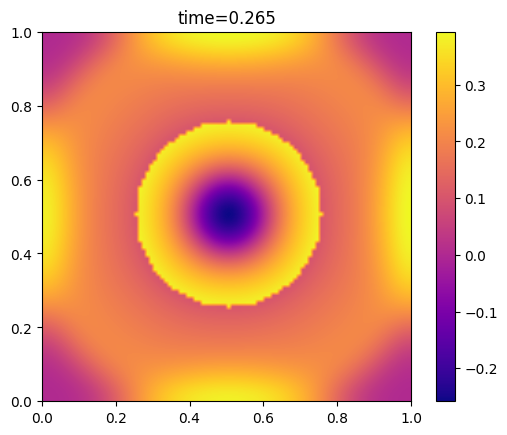

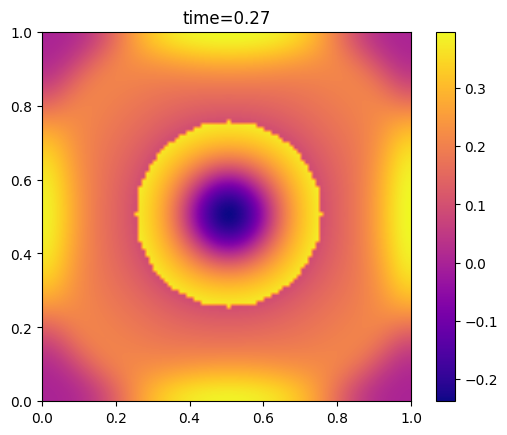

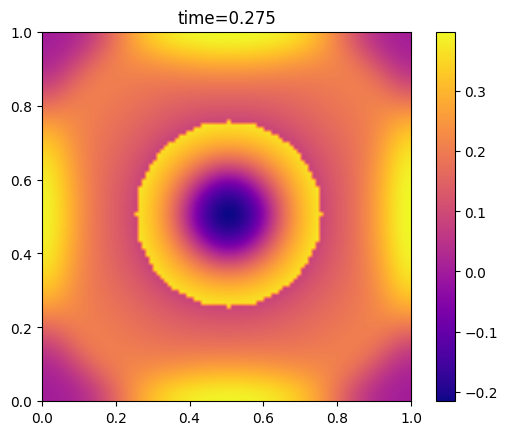

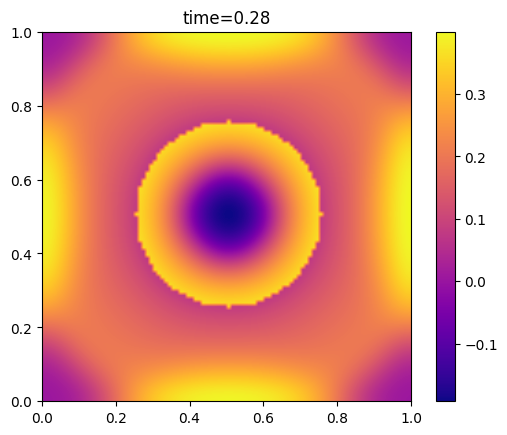

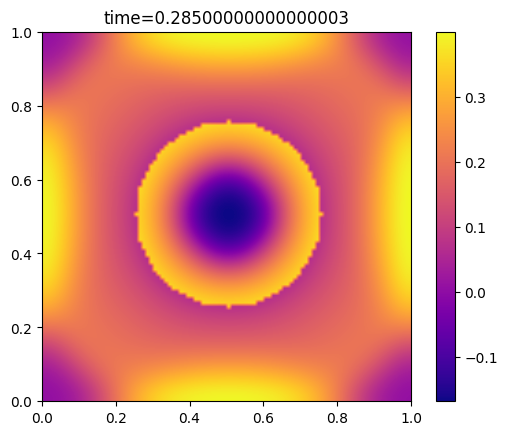

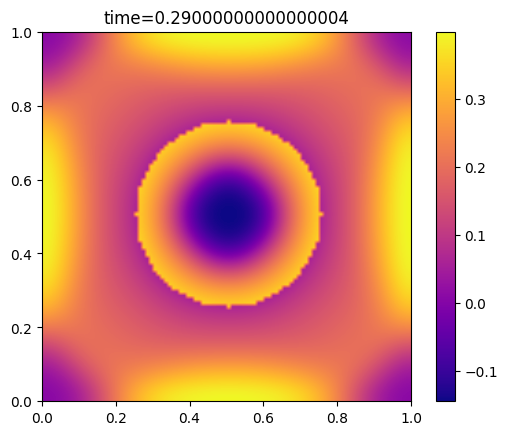

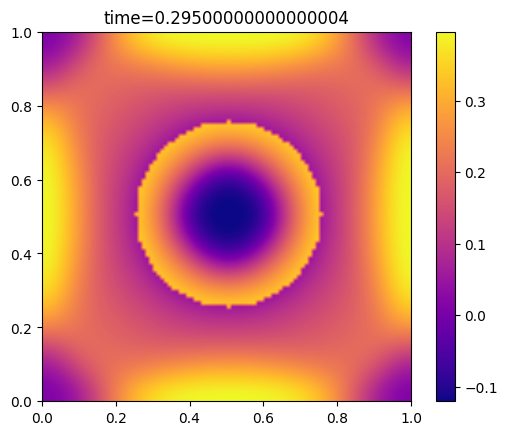

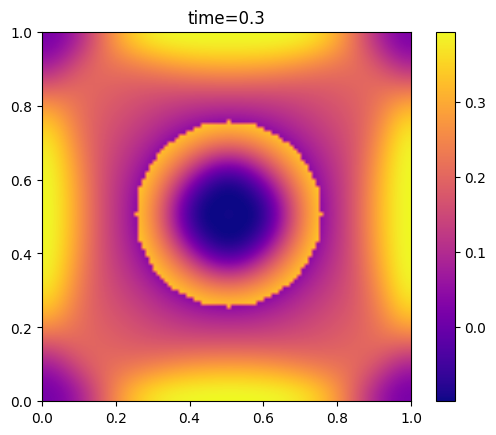

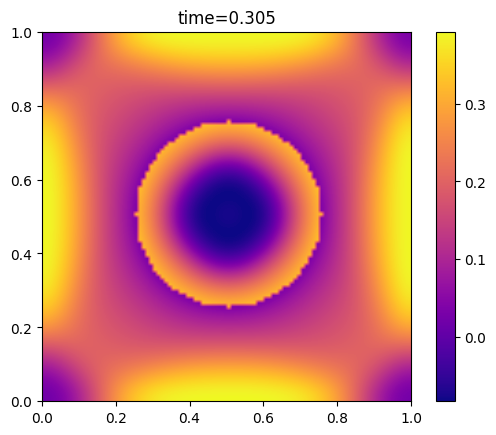

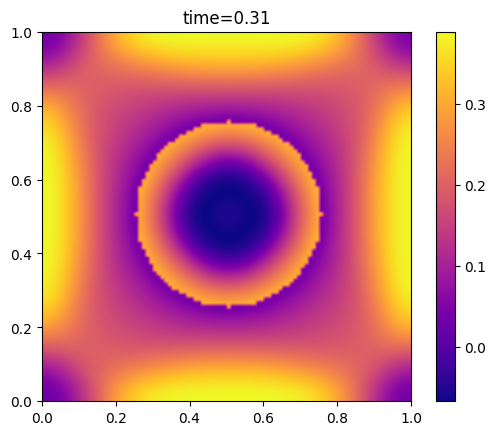

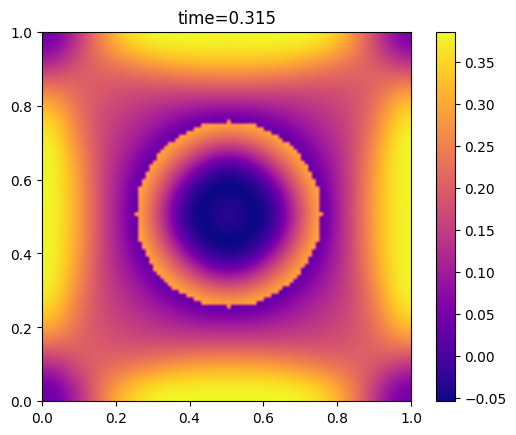

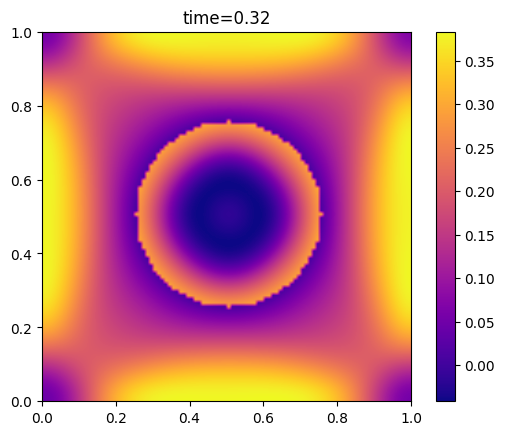

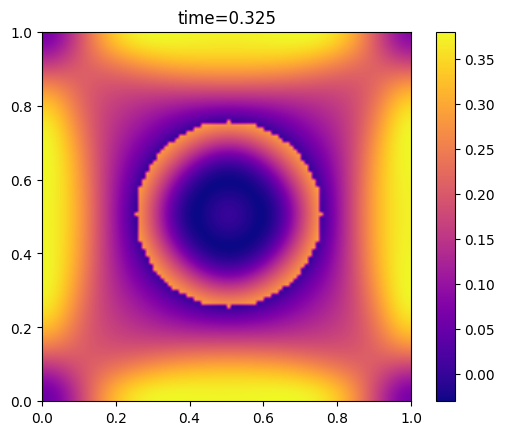

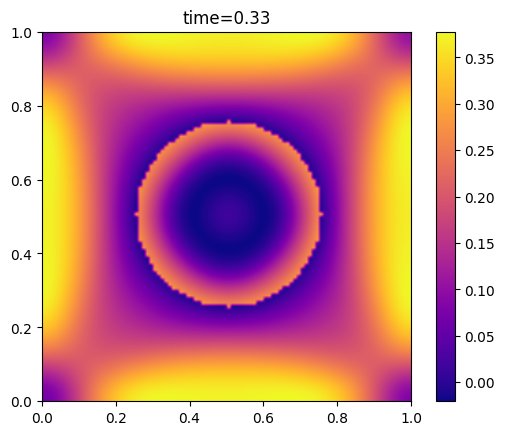

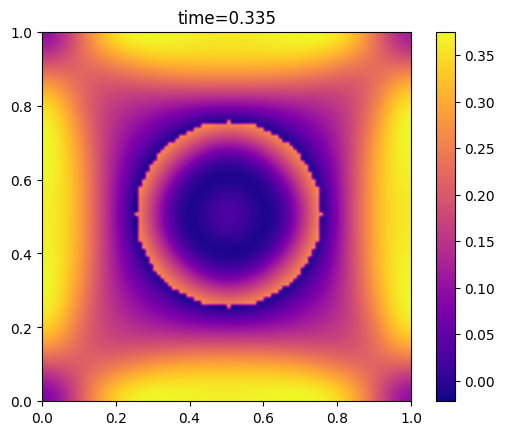

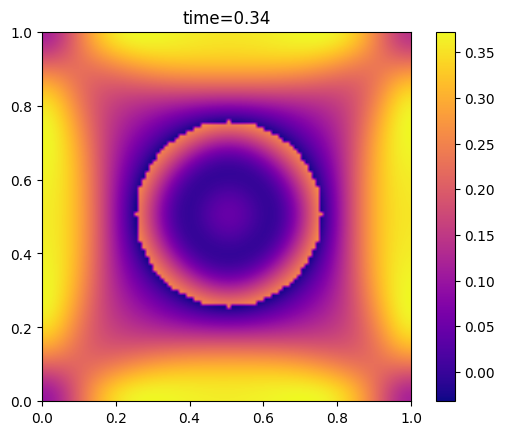

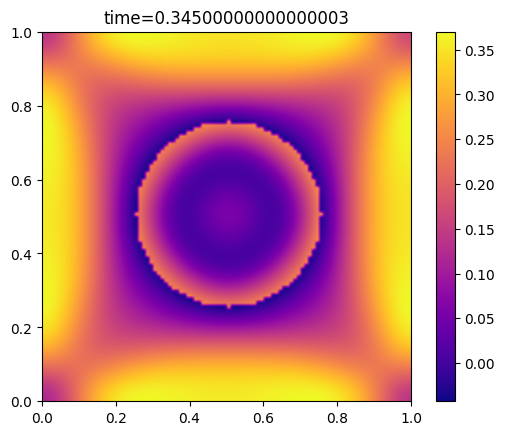

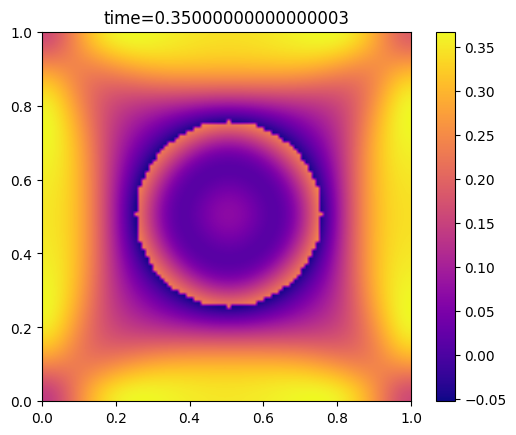

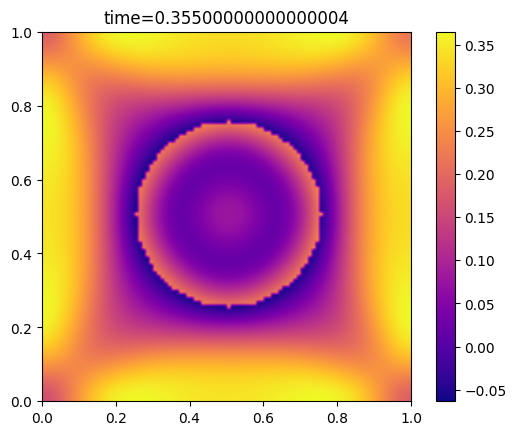

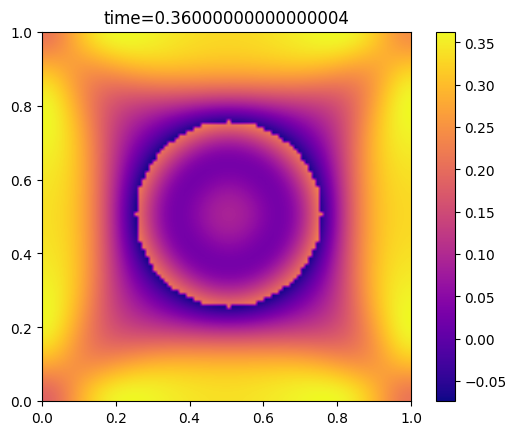

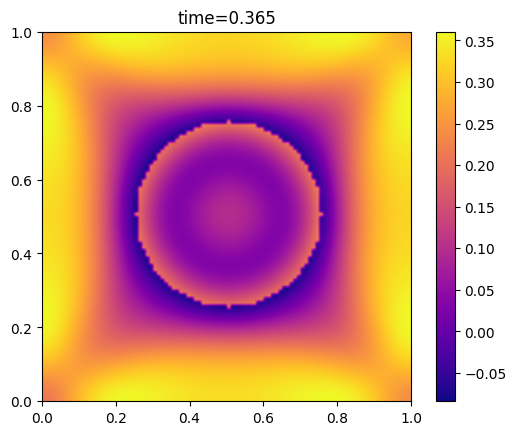

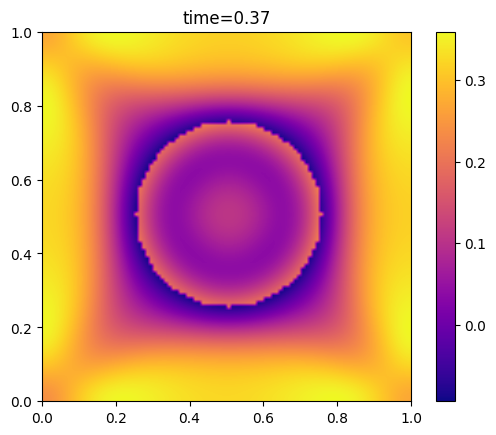

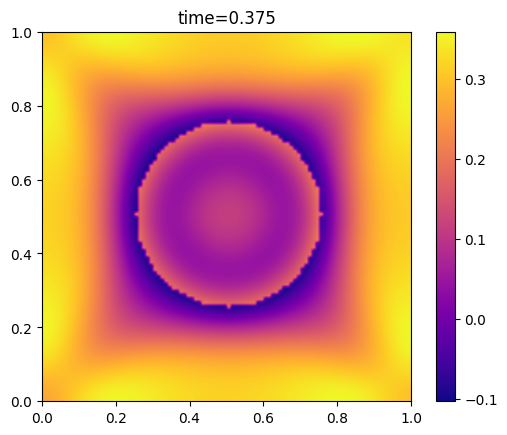

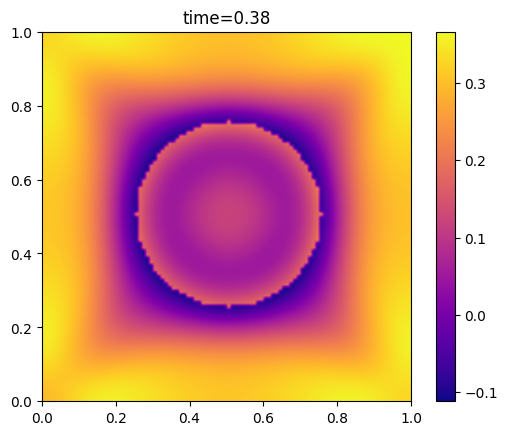

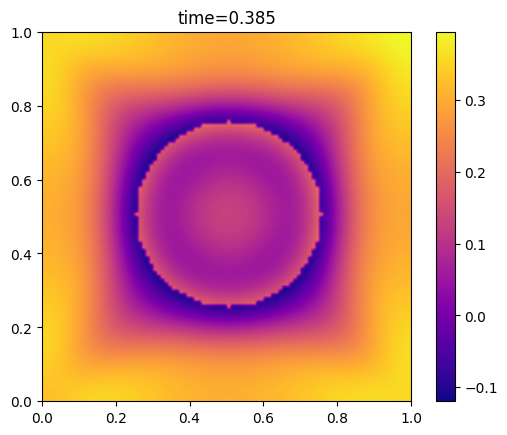

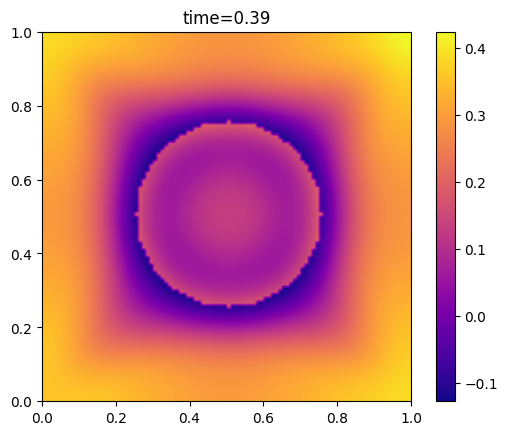

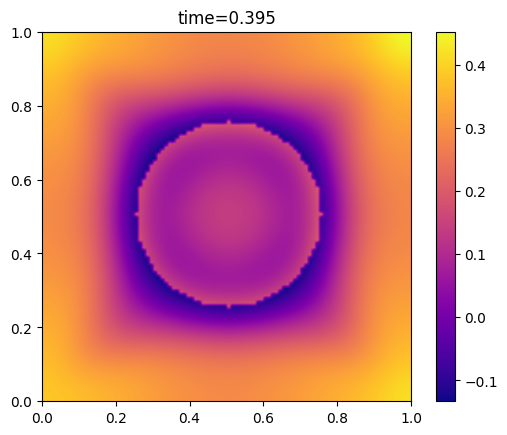

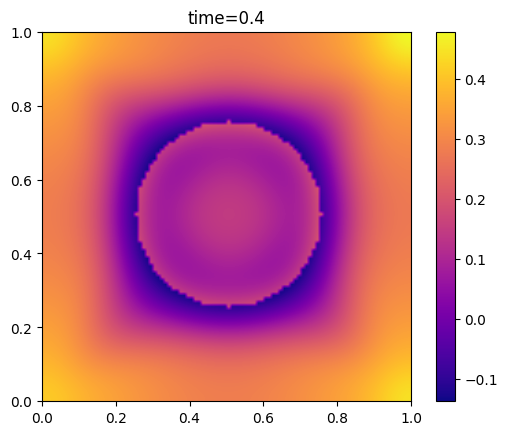

In [23]:
import matplotlib.pyplot as plt
x_extent = [0, 1]
y_extent = [0, 1]
plt.figure(dpi=500)


for n in range(0,Range,50):
    plt.imshow(Q[0,n,:,:], cmap='plasma', origin='lower', interpolation='bilinear',extent=[x_extent[0], x_extent[1], y_extent[0], y_extent[1]])
    plt.colorbar()
    plt.title('time={}'.format(n*dt))

    plt.show()
    
    
